In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prepossessed-arrays-of-binary-data/Binary_images_data_128.npz
/kaggle/input/prepossessed-arrays-of-binary-data/Binary_images_data_90.npz
/kaggle/input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_264.npz
/kaggle/input/prepossessed-arrays-of-binary-data/1000_Binary Dataframe
/kaggle/input/prepossessed-arrays-of-binary-data/Binary_images_data_264.npz
/kaggle/input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_128.npz
/kaggle/input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_90.npz
/kaggle/input/prepossessed-arrays-of-binary-data/Binary Dataframe
/kaggle/input/diabetic-retinopathy-detection/train.zip.003
/kaggle/input/diabetic-retinopathy-detection/test.zip.004
/kaggle/input/diabetic-retinopathy-detection/test.zip.005
/kaggle/input/diabetic-retinopathy-detection/train.zip.002
/kaggle/input/diabetic-retinopathy-detection/test.zip.006
/kaggle/input/diabetic-retinopathy-detection/test.zip.003
/kaggle/input/diabetic-retinopathy-detection

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot
from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K


import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False

import warnings
warnings.filterwarnings('ignore')
print("All modules have been imported")

All modules have been imported


In [8]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [9]:
info=pd.read_csv("../input/prepossessed-arrays-of-binary-data/1000_Binary Dataframe")
info=info.drop('Unnamed: 0',axis=1)
info.head()

,exists,eye_side,level,path,patient_id,level_cat
0,True,left,0,../input/diabetic-retinopathy-detection/10_lef...,10,[1. 0.]
1,True,right,0,../input/diabetic-retinopathy-detection/10_rig...,10,[1. 0.]
2,True,left,0,../input/diabetic-retinopathy-detection/13_lef...,13,[1. 0.]
3,True,right,0,../input/diabetic-retinopathy-detection/13_rig...,13,[1. 0.]
4,True,left,0,../input/diabetic-retinopathy-detection/17_lef...,17,[1. 0.]


In [10]:
Binary_90 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_90.npz')
X_90=Binary_90['a']
Binary_128 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_128.npz')
X_128=Binary_128['a']
Binary_264 = np.load('../input/prepossessed-arrays-of-binary-data/1000_Binary_images_data_264.npz')
X_264=Binary_264['a']
y=info['level'].values


print(X_90.shape)
print(X_128.shape)
print(X_264.shape)
print(y.shape)

(1000, 24300)
(1000, 49152)
(1000, 209088)
(1000,)


In [11]:
print("Shape before reshaping X_90" +str(X_90.shape))
X_90=X_90.reshape(1000,90,90,3)
print("Shape after reshaping X_90" +str(X_90.shape))
print("\n\n")

print("Shape before reshaping X_128" +str(X_128.shape))
X_128=X_128.reshape(1000,128,128,3)
print("Shape after reshaping X_128" +str(X_128.shape))
print("\n\n")

print("Shape before reshaping X_264" +str(X_264.shape))
X_264=X_264.reshape(1000,264,264,3)
print("Shape after reshaping X_264" +str(X_264.shape))

Shape before reshaping X_90(1000, 24300)
Shape after reshaping X_90(1000, 90, 90, 3)



Shape before reshaping X_128(1000, 49152)
Shape after reshaping X_128(1000, 128, 128, 3)



Shape before reshaping X_264(1000, 209088)
Shape after reshaping X_264(1000, 264, 264, 3)


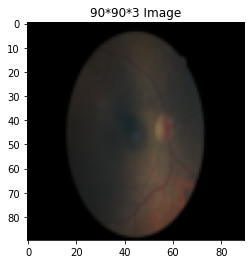

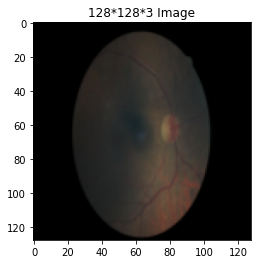

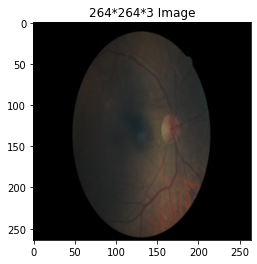

In [12]:
plt.title("90*90*3 Image")
plt.imshow(X_90[1])
plt.show()

plt.title("128*128*3 Image")
plt.imshow(X_128[1])
plt.show()

plt.title("264*264*3 Image")
plt.imshow(X_264[1])
plt.show()

In [13]:
y.shape

(1000,)

In [14]:
X=np.array(X_264)
Y=np.array(y)
Y=to_categorical(Y,5)
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)
print(len(x_train),len(x_val),len(x_test))

600 200 200


In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(264,264,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

2022-02-28 04:04:46.760546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-28 04:04:46.848947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-28 04:04:46.849696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-28 04:04:46.850917: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [16]:
c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=2,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','AUC'])
history=model.fit(x_train,y_train,epochs=40,batch_size=16,validation_split=0.3)

2022-02-28 04:05:12.960263: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 351267840 exceeds 10% of free system memory.
2022-02-28 04:05:13.345675: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 351267840 exceeds 10% of free system memory.
2022-02-28 04:05:13.793114: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-02-28 04:05:16.104283: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


27/27 [==============================] - 11s 112ms/step - loss: 1.2586 - accuracy: 0.5690 - auc: 0.8284 - val_loss: 0.6382 - val_accuracy: 0.7556 - val_auc: 0.9323
Epoch 2/40
27/27 [==============================] - 2s 59ms/step - loss: 0.9391 - accuracy: 0.6524 - auc: 0.8886 - val_loss: 0.7765 - val_accuracy: 0.7556 - val_auc: 0.9389
Epoch 3/40
27/27 [==============================] - 1s 54ms/step - loss: 0.8297 - accuracy: 0.6190 - auc: 0.9077 - val_loss: 0.6476 - val_accuracy: 0.7556 - val_auc: 0.9389
Epoch 4/40
27/27 [==============================] - 1s 53ms/step - loss: 0.8265 - accuracy: 0.6452 - auc: 0.9049 - val_loss: 0.6285 - val_accuracy: 0.7556 - val_auc: 0.9389
Epoch 5/40
27/27 [==============================] - 1s 53ms/step - loss: 0.7695 - accuracy: 0.6667 - auc: 0.9146 - val_loss: 0.5705 - val_accuracy: 0.7556 - val_auc: 0.9389
Epoch 6/40
27/27 [==============================] - 1s 54ms/step - loss: 0.7750 - accuracy: 0.6929 - auc: 0.9166 - val_loss: 0.5586 - val_accura

In [17]:
y_test=np.argmax(y_test, axis=1)
pred=np.argmax(model.predict(x_test),axis=-1)

In [18]:
print("Performance Report:")
y_pred6=np.argmax(model.predict(x_test),axis=-1)
Y_test=to_categorical(y_test,5)
y_pred_prb6=model.predict(x_test)
target=['0','1']
from sklearn import metrics
print('Accuracy score is :', metrics.accuracy_score(y_test, y_pred6))
print('Precision score is :', metrics.precision_score(y_test, y_pred6, average='weighted'))
print('Recall score is :',metrics.recall_score(y_test,y_pred6, average='weighted'))
print('F1 Score is :', metrics.f1_score(y_test, y_pred6,average='weighted'))
print('Cohen Kappa Score:', metrics.cohen_kappa_score(y_test, y_pred6))
print('\t\tClassification Report:\n', metrics.classification_report(y_test,pred,target_names=target))

Performance Report:
Accuracy score is : 0.785
Precision score is : 0.616225
Recall score is : 0.785
F1 Score is : 0.6904481792717087
Cohen Kappa Score: 0.0
		Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       157
           1       0.00      0.00      0.00        43

    accuracy                           0.79       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.62      0.79      0.69       200



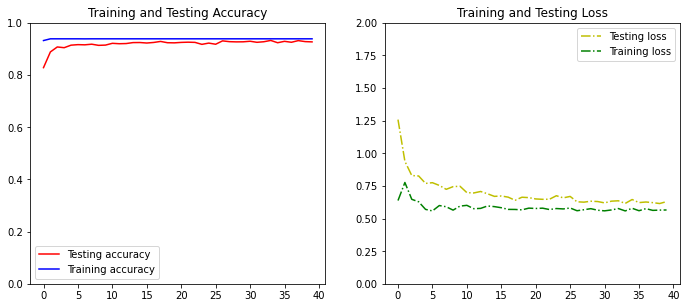

In [22]:
import matplotlib.pyplot as plt
auc = history.history['auc']
val_auc = history.history['val_auc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(auc))
plt.figure(figsize=(18, 4.8))
plt.subplot(1,3,1)
plt.plot(epochs, auc, 'r', label='Testing accuracy')
plt.plot(epochs, val_auc, 'b', label='Training accuracy')
plt.ylim(0, 1)
plt.title('Training and Testing Accuracy')
plt.legend(loc=0)

plt.subplot(1,3,2)
plt.plot(epochs, loss, 'y-.', label='Testing loss')
plt.plot(epochs, val_loss, 'g-.', label='Training loss')
plt.title('Training and Testing Loss')
plt.ylim(0, 2)
plt.legend(loc=0)
plt.show();